In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 函数式API 功能API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input], outputs=[output])

model.summary()
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [11]:
history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 522us/step - loss: 0.4062 - val_loss: 0.4307
Epoch 2/100
363/363 [==============================] - 0s 453us/step - loss: 0.4043 - val_loss: 0.4283
Epoch 3/100
363/363 [==============================] - 0s 459us/step - loss: 0.4028 - val_loss: 0.4256
Epoch 4/100
363/363 [==============================] - 0s 462us/step - loss: 0.4011 - val_loss: 0.4241
Epoch 5/100
363/363 [==============================] - 0s 459us/step - loss: 0.3993 - val_loss: 0.4254
Epoch 6/100
363/363 [==============================] - 0s 462us/step - loss: 0.3978 - val_loss: 0.4200
Epoch 7/100
363/363 [==============================] - 0s 460us/step - loss: 0.3962 - val_loss: 0.4204
Epoch 8/100
363/363 [==============================] - 0s 464us/step - loss: 0.3950 - val_loss: 0.4162
Epoch 9/100
363/363 [==============================] - 0s 453us/step - loss: 0.3936 - val_loss: 0.4147
Epoch 10/100
363/363 [==============================] - 0s 459us/step - l

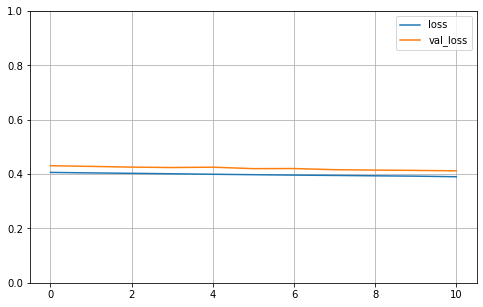

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 296us/step - loss: 0.4095


0.4094708561897278